<a href="https://colab.research.google.com/github/kenedy21/Data-Analysis-Science-ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import warnings

In [ ]:
from pandas._libs.lib import to_object_array_tuples
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

In [ ]:
test = pd.read_csv('/content/test(1).csv')
train = pd.read_csv('/content/train(1).csv')

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.Pclass.unique()

array([3, 1, 2])

In [ ]:
# drop unnecessary columns
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
## function to find missing values in age

def age_approx(cols):
    Age = cols[0]
    Pclass =  cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return Age



In [ ]:
train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
train['Age'] = train[['Age','Pclass']].apply(age_approx,axis=1)

In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         850
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
train.Age.unique()

array([nan, 29., 37.])

In [ ]:
train.dropna(inplace=True)


In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
train_dummied = pd.get_dummies(train,columns=['Sex'])

In [ ]:
train_dummied = pd.get_dummies(train_dummied,columns=['Embarked'])


In [ ]:
train_dummied.head(13)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
17,1,2,29.0,0,0,13.0000,0,1,0,0,1
31,1,1,37.0,1,0,146.5208,1,0,1,0,0
55,1,1,37.0,0,0,35.5000,0,1,0,0,1
64,0,1,37.0,0,0,27.7208,0,1,1,0,0
166,1,1,37.0,0,1,55.0000,1,0,0,0,1
168,0,1,37.0,0,0,25.9250,0,1,0,0,1
181,0,2,29.0,0,0,15.0500,0,1,1,0,0
185,0,1,37.0,0,0,50.0000,0,1,0,0,1
256,1,1,37.0,0,0,79.2000,1,0,1,0,0
270,0,1,37.0,0,0,31.0000,0,1,0,0,1


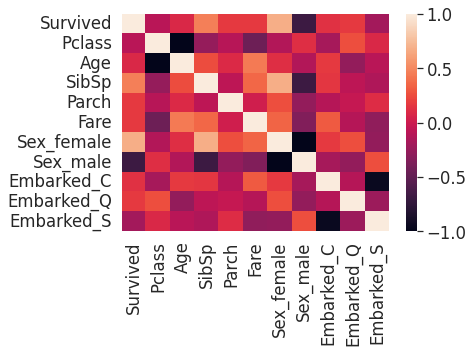

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(train_dummied.corr())

In [ ]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [ ]:
X = train_dummied[used_features]
y = train_dummied['Survived']

In [ ]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
logmodel =LogisticRegression()
logmodel.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
logpred = logmodel.predict(xtest)
metrics.confusion_matrix(ytest,logpred)

array([[3, 0],
       [3, 3]])

In [ ]:
metrics.accuracy_score(ytest,logpred)

0.6666666666666666

In [ ]:
print(classification_report(ytest,logpred))

In [ ]:
logmodel.coef_,logmodel.intercept_

(array([[ 0.00734732, -0.07014146,  0.71986319,  0.        ,  1.26858248,
         -1.26883499, -0.03437172,  0.13537693, -0.10125773]]),
 array([2.46038253]))

In [ ]:
logmodel.predict_proba(xtest)

array([[0.81721578, 0.18278422],
       [0.81721578, 0.18278422],
       [0.24848539, 0.75151461],
       [0.81721578, 0.18278422],
       [0.26118461, 0.73881539],
       [0.13864742, 0.86135258],
       [0.71689629, 0.28310371],
       [0.80701205, 0.19298795],
       [0.81721578, 0.18278422]])